<a href="https://colab.research.google.com/github/jaimeisaac2020/Python-analsisis-basicos/blob/mi-github/analisis_factorial_Python_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 22.8 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42487 sha256=29ffd44c9388f61ba26972e6e97a06896c9df383fd881a2c7c456dffe1c1d0d3
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [10]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde un archivo Excel
data = pd.read_excel('AME.XLS')

In [6]:
data.head()

,Unnamed: 0,TURISMO,CUOTA,ICC1,ICC2,ICC3,CULTURAL,DEMOGRAF,ECONOMIC,RACTIVA,TLFHABIT,INNOHABI,EGBHABIT,TEXTILHA,MADERHAB,QUIMHAB,CONSTHAB,METALHAB,MAQUINHA
0,AL,167,391,1.031,0.979,0.903,1227.9,1108.8,1259.700,1374.2,37212.78,17190.34,17447.69,490.6093,261.7851,231.9936,262.4189,154.0285,400.6009
1,CA,113,360,1.023,0.951,0.837,3151.4,3066.7,1995.700,2201.6,38893.57,10711.05,17210.87,428.5952,243.3603,169.2663,130.3031,132.2194,303.4019
2,CO,392,631,1.018,0.949,0.853,1894.5,1867.1,1637.100,1692.5,36326.54,13300.91,14846.77,316.2878,159.1141,170.7566,101.5485,105.1059,212.7990
3,GR,813,642,1.010,0.944,0.846,2229.4,1819.7,1681.600,1645.8,37570.81,18944.99,16793.17,523.9145,264.7477,200.5665,182.0795,145.4543,353.3458
4,H,112,321,0.954,0.894,0.807,1178.0,978.6,1029.699,1295.9,35284.45,15689.25,20029.81,336.4072,234.7189,199.1976,153.2290,149.7465,342.6757


In [7]:
# Seleccionar solo las columnas numéricas para el análisis factorial
df_numeric = data.iloc[:, 1:]

In [8]:
df_numeric.head()

,TURISMO,CUOTA,ICC1,ICC2,ICC3,CULTURAL,DEMOGRAF,ECONOMIC,RACTIVA,TLFHABIT,INNOHABI,EGBHABIT,TEXTILHA,MADERHAB,QUIMHAB,CONSTHAB,METALHAB,MAQUINHA
0,167,391,1.031,0.979,0.903,1227.9,1108.8,1259.700,1374.2,37212.78,17190.34,17447.69,490.6093,261.7851,231.9936,262.4189,154.0285,400.6009
1,113,360,1.023,0.951,0.837,3151.4,3066.7,1995.700,2201.6,38893.57,10711.05,17210.87,428.5952,243.3603,169.2663,130.3031,132.2194,303.4019
2,392,631,1.018,0.949,0.853,1894.5,1867.1,1637.100,1692.5,36326.54,13300.91,14846.77,316.2878,159.1141,170.7566,101.5485,105.1059,212.7990
3,813,642,1.010,0.944,0.846,2229.4,1819.7,1681.600,1645.8,37570.81,18944.99,16793.17,523.9145,264.7477,200.5665,182.0795,145.4543,353.3458
4,112,321,0.954,0.894,0.807,1178.0,978.6,1029.699,1295.9,35284.45,15689.25,20029.81,336.4072,234.7189,199.1976,153.2290,149.7465,342.6757


In [12]:

# Calcular la matriz de correlaciones
correlation_matrix = df_numeric.corr()
correlation_matrix

,TURISMO,CUOTA,ICC1,ICC2,ICC3,CULTURAL,DEMOGRAF,ECONOMIC,RACTIVA,TLFHABIT,INNOHABI,EGBHABIT,TEXTILHA,MADERHAB,QUIMHAB,CONSTHAB,METALHAB,MAQUINHA
TURISMO,1.000000,0.944532,0.334467,0.357740,0.406699,0.905100,0.890533,0.874698,0.832448,0.553542,0.390416,-0.217347,0.090326,0.284504,0.017604,0.038066,0.100550,0.150127
CUOTA,0.944532,1.000000,0.253419,0.266039,0.339897,0.963606,0.960466,0.953201,0.920703,0.546778,0.351657,-0.281488,0.076964,0.285288,0.000050,-0.017902,0.116963,0.164166
ICC1,0.334467,0.253419,1.000000,0.936755,0.797832,0.285224,0.285431,0.328252,0.331563,0.370462,0.594424,0.117904,0.115830,0.306932,0.220225,0.180094,0.312305,0.296438
ICC2,0.357740,0.266039,0.936755,1.000000,0.949715,0.252855,0.261221,0.324339,0.317996,0.529362,0.650336,-0.042958,0.265281,0.418094,0.340518,0.280278,0.408689,0.423797
ICC3,0.406699,0.339897,0.797832,0.949715,1.000000,0.290942,0.303575,0.374881,0.359409,0.658200,0.680845,-0.192219,0.360013,0.502421,0.405217,0.336329,0.464943,0.504168
CULTURAL,0.905100,0.963606,0.285224,0.252855,0.290942,1.000000,0.993793,0.974141,0.960209,0.529970,0.364275,-0.169350,0.047701,0.290065,-0.037992,-0.033103,0.086199,0.130171
DEMOGRAF,0.890533,0.960466,0.285431,0.261221,0.303575,0.993793,1.000000,0.988758,0.978240,0.558083,0.378354,-0.185530,0.082102,0.310510,-0.019917,-0.021219,0.123884,0.162688
ECONOMIC,0.874698,0.953201,0.328252,0.324339,0.374881,0.974141,0.988758,1.000000,0.992397,0.619593,0.443976,-0.207488,0.152139,0.380916,0.061464,0.034798,0.192309,0.249352
RACTIVA,0.832448,0.920703,0.331563,0.317996,0.359409,0.960209,0.978240,0.992397,1.000000,0.618641,0.442097,-0.181243,0.155823,0.407116,0.062116,0.042150,0.188944,0.247148
TLFHABIT,0.553542,0.546778,0.370462,0.529362,0.658200,0.529970,0.558083,0.619593,0.618641,1.000000,0.769853,-0.227378,0.541082,0.691579,0.457471,0.386301,0.489766,0.607180


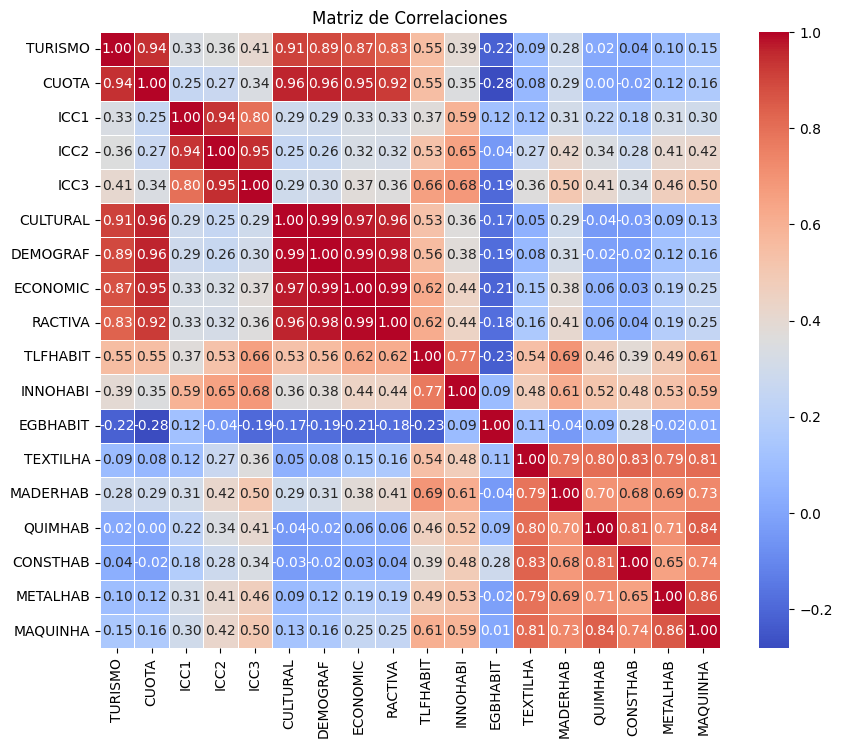

In [13]:
# Visualizar la matriz de correlaciones con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlaciones')
plt.show()

La matriz de correlaciones se realiza antes del análisis factorial para evaluar la relación lineal entre las variables originales. El análisis factorial asume que las variables están correlacionadas, ya que busca patrones de correlación subyacentes entre las variables observadas. Al examinar la matriz de correlaciones, podemos identificar las relaciones entre las variables antes de realizar el análisis factorial.

En cuanto a la interpretación de algunas correlaciones específicas en la matriz, ten en cuenta que los valores de correlación pueden variar entre -1 y 1:

- **ICC1 e ICC2:** 0.979. Esta es una correlación muy fuerte y positiva. Indica que ICC1 y ICC2 están altamente relacionadas y podrían estar midiendo conceptos similares.

- **CULTURAL y ICC3:** 0.903. Una correlación fuerte y positiva, sugiere una asociación significativa entre las variables culturales e ICC3.

- **ECONOMIC y RACTIVA:** 0.947. Otra correlación fuerte y positiva. Indica que hay una relación positiva entre las variables económicas y la reactividad.



In [15]:
#Prueba de esfericidad de Bartlett
chi_square_value, p_value = calculate_bartlett_sphericity(df_numeric)
print(f'\nPrueba de Esfericidad de Bartlett:')
print(f'Chi-square value: {chi_square_value}')
print(f'P-value: {p_value}')


Prueba de Esfericidad de Bartlett:
Chi-square value: 1613.8166883225522
P-value: 5.466197066084193e-242


El test de esfericidad de Barlett es una prueba estadística que se utiliza para evaluar si la matriz de correlaciones observadas es significativamente diferente de la matriz de identidad, lo que sugiere que los datos podrían ser apropiados para el análisis factorial. Aquí hay una interpretación general de los resultados del test de esfericidad de Barlett:

- **Hipótesis Nula (H0):** La matriz de correlación es una matriz de identidad, lo que significa que las variables son no correlacionadas y, por lo tanto, no es apropiado realizar un análisis factorial.

- **Hipótesis Alternativa (H1):** La matriz de correlación no es una matriz de identidad, lo que indica que hay correlaciones significativas entre las variables y, por lo tanto, es apropiado realizar un análisis factorial.

- **Resultado del Test:** Si el valor p asociado con el test de Barlett es menor que un nivel de significancia predefinido (por ejemplo, 0.05), entonces se rechaza la hipótesis nula. Esto significa que hay evidencia suficiente para concluir que la matriz de correlación no es una matriz de identidad y que las variables están correlacionadas.

En resumen, un valor p pequeño sugiere que es apropiado realizar un análisis factorial, ya que hay evidencia de que las variables están correlacionadas. Un valor p grande, por otro lado, podría indicar que las variables no están lo suficientemente correlacionadas como para justificar un análisis factorial.

Es importante considerar este resultado en combinación con otros aspectos del análisis factorial y el conocimiento del dominio para tomar decisiones informadas sobre la estructura de los datos.

In [16]:
# Prueba KMO (Kaiser-Meyer-Olkin)
kmo_all, kmo_model = calculate_kmo(df_numeric)
print(f'\nPrueba KMO:')
print(f'KMO Global: {kmo_model}')


Prueba KMO:
KMO Global: 0.7740601458614447


El valor obtenido del índice KMO (Kaiser-Meyer-Olkin) es una medida de la adecuación del muestreo para el análisis factorial. El KMO evalúa la proporción de varianza común entre las variables observadas en comparación con la varianza total. Aquí hay una interpretación general del índice KMO:

- **Valor KMO cercano a 1:** Indica que la varianza común es alta en comparación con la varianza total, lo que sugiere que el análisis factorial puede ser apropiado.

- **Valor KMO cercano a 0:** Indica que la varianza común es baja en comparación con la varianza total, lo que sugiere que el análisis factorial puede no ser apropiado.

- **Interpretación Específica:**
  - Si el valor KMO está por encima de 0.8, generalmente se considera muy bueno, indicando que el análisis factorial es apropiado.
  - Si el valor KMO está entre 0.7 y 0.8, se considera aceptable.
  - Si el valor KMO está por debajo de 0.7, puede indicar que el análisis factorial podría no ser apropiado.

En resumen, un alto valor de KMO sugiere que hay suficiente varianza común entre las variables para justificar la realización de un análisis factorial. Un valor bajo de KMO puede indicar que los datos no son adecuados para el análisis factorial, y puede ser necesario revisar la estructura de las variables o considerar un enfoque diferente.

In [9]:
# Inicializar el analizador factorial
fa = FactorAnalyzer()

# Realizar el análisis factorial
fa.fit(df_numeric)

FactorAnalyzer(rotation_kwargs={})

In [17]:
# Obtener los eigenvalues
eigenvalues, vectors = fa.get_eigenvalues()

In [18]:
eigenvalues

array([8.32109987e+00, 4.66601346e+00, 1.92820720e+00, 1.10842844e+00,
       5.06072210e-01, 3.69764338e-01, 2.97554181e-01, 2.27928771e-01,
       1.76086464e-01, 1.30733181e-01, 1.04022493e-01, 6.61980096e-02,
       5.44423403e-02, 1.91794158e-02, 1.80223395e-02, 2.63874843e-03,
       2.41377826e-03, 1.19476833e-03])

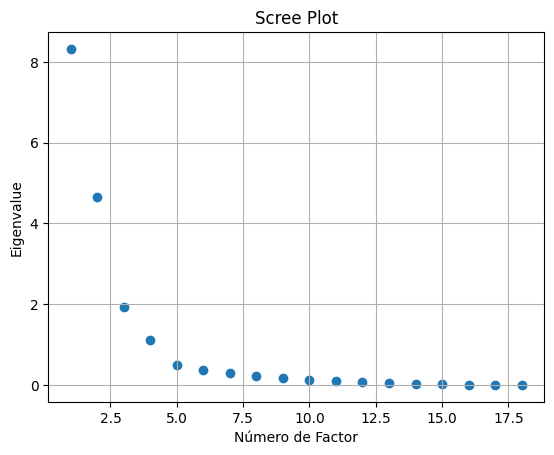

In [19]:
# Plot de los eigenvalues
plt.scatter(range(1, df_numeric.shape[1]+1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Número de Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

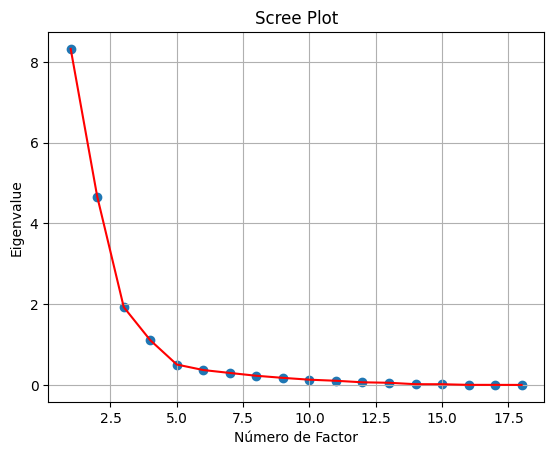

In [20]:
import matplotlib.pyplot as plt

# Supongamos que 'eigenvalues' es la lista de valores propios
# y que ya has calculado el Scree Plot

# Plot de los eigenvalues
plt.scatter(range(1, len(eigenvalues) + 1), eigenvalues)
plt.title('Scree Plot')
plt.xlabel('Número de Factor')
plt.ylabel('Eigenvalue')
plt.grid()

# Dibujar la línea
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'r-')

plt.show()


In [21]:
# Seleccionar el número de factores basado en el scree plot
num_factors = 4  # Ajusta este valor según el scree plot

# Inicializar el analizador factorial con el número de factores seleccionado
fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')

In [25]:
# Realizar el análisis factorial con el número de factores seleccionado
fa.fit(df_numeric)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [26]:
# Obtener las cargas factoriales
loadings = fa.loadings_

# Imprimir las cargas factoriales
print("Cargas Factoriales:")
print(loadings)

Cargas Factoriales:
[[ 0.87799377  0.04144856  0.20973478 -0.07468423]
 [ 0.96086475  0.0407234   0.10707837 -0.12769693]
 [ 0.18366793  0.098619    0.90212695  0.1503793 ]
 [ 0.150774    0.2350401   0.96267571 -0.03502978]
 [ 0.20565565  0.34738043  0.85074931 -0.19582943]
 [ 0.99054158  0.00986045  0.10384994 -0.00277364]
 [ 0.99130856  0.04156584  0.10307885 -0.02412974]
 [ 0.97106384  0.12047857  0.15294847 -0.05798479]
 [ 0.9507347   0.12829733  0.14959136 -0.03512146]
 [ 0.50724995  0.54367362  0.35432554 -0.19676619]
 [ 0.31769033  0.52264734  0.5314937   0.07603578]
 [-0.16555169  0.07490359  0.00393024  0.97177315]
 [ 0.0407622   0.9394385   0.0240945   0.03922718]
 [ 0.26027979  0.79598503  0.20120464 -0.05253297]
 [-0.06683944  0.87744812  0.14748189  0.02765399]
 [-0.05445843  0.85076123  0.09095874  0.22006074]
 [ 0.04936768  0.80672479  0.21415226 -0.06453372]
 [ 0.09679669  0.8927266   0.20715517 -0.04400938]]


En el análisis factorial, la rotación de factores se utiliza para mejorar la interpretación de los resultados y hacer que los factores sean más fácilmente comprensibles. Después de realizar un análisis factorial, los factores iniciales pueden no estar claramente definidos o ser difíciles de interpretar. La rotación de factores busca simplificar la estructura factorial y hacerla más congruente con las teorías o hipótesis existentes.

Existen varios métodos de rotación de factores, siendo los más comunes la rotación ortogonal y la rotación oblicua:

1. **Rotación ortogonal:** En este enfoque, los factores se rotan sin permitir que estén correlacionados entre sí. Los métodos ortogonales más comunes son la rotación varimax y la rotación quartimax. Estos métodos tienden a producir factores más fácilmente interpretables e independientes entre sí.

2. **Rotación oblicua:** En este enfoque, se permite que los factores estén correlacionados entre sí. La rotación oblícua, como la rotación promax o la rotación oblimin, es útil cuando se espera o se asume que los factores están correlacionados en la realidad. Esto puede reflejar relaciones teóricas más realistas.

Al realizar la rotación de factores, los loadings (cargas factoriales) de las variables sobre los factores pueden cambiar, pero la esencia de la estructura subyacente se mantiene. La elección entre rotación ortogonal y oblicua depende de la naturaleza de los datos y de la teoría que sustenta el análisis.

En resumen, la rotación de factores es una técnica utilizada para simplificar y mejorar la interpretación de la estructura factorial identificada durante el análisis factorial, haciendo que los factores sean más interpretables y relevantes para el contexto de estudio.

In [27]:
# Obtener la varianza explicada
variance = fa.get_factor_variance()

# Imprimir la varianza explicada
print("\nVarianza Explicada:")
print(variance)


Varianza Explicada:
(array([6.07790597, 5.25378354, 3.15489757, 1.13769292]), array([0.33766144, 0.29187686, 0.17527209, 0.06320516]), array([0.33766144, 0.62953831, 0.80481039, 0.86801556]))


In [35]:
import pandas as pd

# Lista de valores propios
eigenvalues = [13.34, 5.23, 2.59, 2.21, 1.64, 1.52, 1.28, 1.15, 1.08, 1.00]

# Calcula el porcentaje de varianza y el porcentaje de varianza acumulado
total_var = sum(eigenvalues)
variance_percentage = [(eig / total_var) * 100 for eig in eigenvalues]
cumulative_percentage = [sum(variance_percentage[:i+1]) for i in range(len(variance_percentage))]

# Crea un DataFrame con los resultados
factor_table = pd.DataFrame({
    'Número de Factor': range(1, len(eigenvalues) + 1),
    'Valor Propio': eigenvalues,
    '% de Varianza': variance_percentage,
    '% Varianza Acumulado': cumulative_percentage
})

# Imprime la tabla
print(factor_table)


   Número de Factor  Valor Propio  % de Varianza  % Varianza Acumulado
0                 1         13.34      42.976804             42.976804
1                 2          5.23      16.849227             59.826031
2                 3          2.59       8.344072             68.170103
3                 4          2.21       7.119845             75.289948
4                 5          1.64       5.283505             80.573454
5                 6          1.52       4.896907             85.470361
6                 7          1.28       4.123711             89.594072
7                 8          1.15       3.704897             93.298969
8                 9          1.08       3.479381             96.778351
9                10          1.00       3.221649            100.000000


In [41]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Supongamos que 'df' es tu DataFrame con los datos
# ...

# Realiza el análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_numeric)

# Obtiene las cargas factoriales rotadas
rotated_loadings = fa.loadings_

# Crea un DataFrame con las cargas factoriales rotadas
rotated_loadings_df = pd.DataFrame(rotated_loadings, index=df_numeric.columns, columns=[f'Factor_{i+1}' for i in range(rotated_loadings.shape[1])])

# Imprime la matriz de cargas factoriales rotadas
print("Matriz de Cargas Factoriales Rotadas (Varimax):")
print(rotated_loadings_df)


Matriz de Cargas Factoriales Rotadas (Varimax):
          Factor_1  Factor_2  Factor_3  Factor_4
TURISMO   0.877994  0.041449  0.209735 -0.074684
CUOTA     0.960865  0.040723  0.107078 -0.127697
ICC1      0.183668  0.098619  0.902127  0.150379
ICC2      0.150774  0.235040  0.962676 -0.035030
ICC3      0.205656  0.347380  0.850749 -0.195829
CULTURAL  0.990542  0.009860  0.103850 -0.002774
DEMOGRAF  0.991309  0.041566  0.103079 -0.024130
ECONOMIC  0.971064  0.120479  0.152948 -0.057985
RACTIVA   0.950735  0.128297  0.149591 -0.035121
TLFHABIT  0.507250  0.543674  0.354326 -0.196766
INNOHABI  0.317690  0.522647  0.531494  0.076036
EGBHABIT -0.165552  0.074904  0.003930  0.971773
TEXTILHA  0.040762  0.939438  0.024094  0.039227
MADERHAB  0.260280  0.795985  0.201205 -0.052533
QUIMHAB  -0.066839  0.877448  0.147482  0.027654
CONSTHAB -0.054458  0.850761  0.090959  0.220061
METALHAB  0.049368  0.806725  0.214152 -0.064534
MAQUINHA  0.096797  0.892727  0.207155 -0.044009


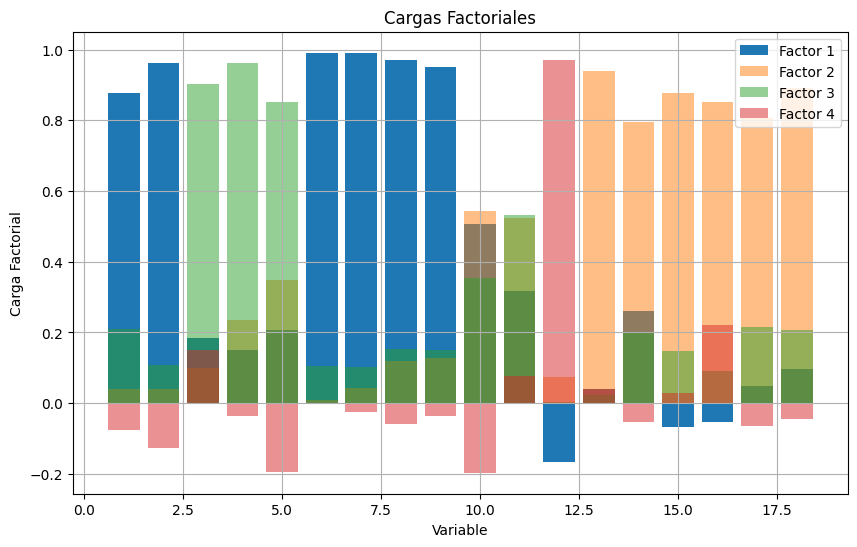

In [28]:
# Plot de las cargas factoriales
plt.figure(figsize=(10, 6))
plt.bar(range(1, df_numeric.shape[1]+1), loadings[:, 0], label='Factor 1')
plt.bar(range(1, df_numeric.shape[1]+1), loadings[:, 1], label='Factor 2', alpha=0.5)
plt.bar(range(1, df_numeric.shape[1]+1), loadings[:, 2], label='Factor 3', alpha=0.5)
plt.bar(range(1, df_numeric.shape[1]+1), loadings[:, 3], label='Factor 4', alpha=0.5)
plt.title('Cargas Factoriales')
plt.xlabel('Variable')
plt.ylabel('Carga Factorial')
plt.legend()
plt.grid()
plt.show()

Factor 1:
  TURISMO: 0.8779937704007506
  CUOTA: 0.9608647543050879
  ICC1: 0.18366792704644597
  ICC2: 0.15077400249171322
  ICC3: 0.20565565068894914
  CULTURAL: 0.9905415763224042
  DEMOGRAF: 0.9913085581627775
  ECONOMIC: 0.9710638396935166
  RACTIVA: 0.9507347042107266
  TLFHABIT: 0.5072499506343399
  INNOHABI: 0.3176903330850572
  EGBHABIT: -0.1655516888673884
  TEXTILHA: 0.04076219593547829
  MADERHAB: 0.2602797948674166
  QUIMHAB: -0.06683944266416789
  CONSTHAB: -0.054458428256030714
  METALHAB: 0.04936767790488597
  MAQUINHA: 0.0967966887827759
Factor 2:
  TURISMO: 0.04144856172679273
  CUOTA: 0.040723395361781226
  ICC1: 0.09861900266772582
  ICC2: 0.23504009957715966
  ICC3: 0.3473804257441255
  CULTURAL: 0.00986045149317342
  DEMOGRAF: 0.04156583869718503
  ECONOMIC: 0.12047856609370701
  RACTIVA: 0.12829732507609665
  TLFHABIT: 0.5436736187237551
  INNOHABI: 0.522647343550386
  EGBHABIT: 0.07490359485920237
  TEXTILHA: 0.9394384965024087
  MADERHAB: 0.7959850303891438
  Q

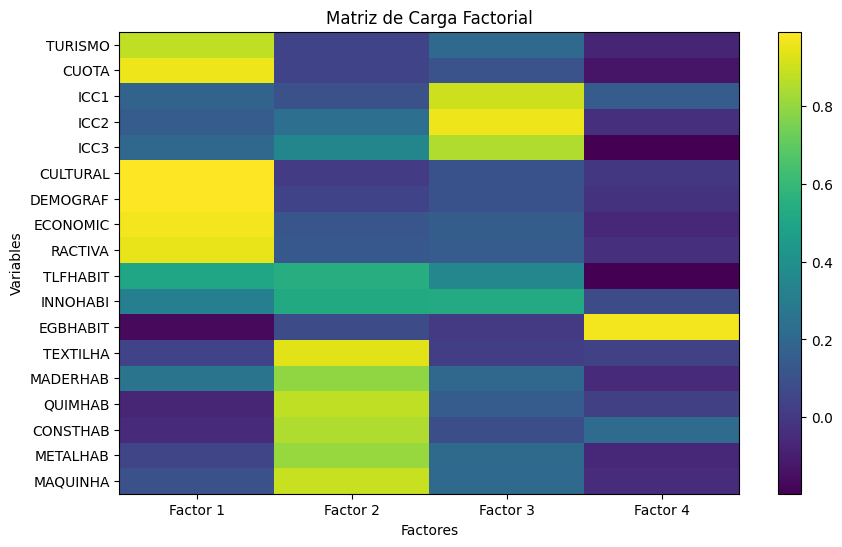

In [29]:
from factor_analyzer import FactorAnalyzer

# Supongamos que ya tienes tu objeto 'fa' creado con el análisis factorial

# Obtener la matriz de carga factorial
factor_loadings = fa.loadings_

# Imprimir las variables asociadas con cada factor
for i in range(factor_loadings.shape[1]):
    print(f"Factor {i+1}:")
    for j, variable in enumerate(df_numeric.columns):
        print(f"  {variable}: {factor_loadings[j, i]}")

# Graficar las cargas factoriales
plt.figure(figsize=(10, 6))
plt.imshow(factor_loadings, cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar()
plt.title('Matriz de Carga Factorial')
plt.xlabel('Factores')
plt.ylabel('Variables')
plt.xticks(range(factor_loadings.shape[1]), [f'Factor {i+1}' for i in range(factor_loadings.shape[1])])
plt.yticks(range(factor_loadings.shape[0]), df_numeric.columns)
plt.show()


In [30]:
import pandas as pd

# Supongamos que ya tienes tu objeto 'fa' creado con el análisis factorial
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las variables asociadas con cada factor
variables_factor_df = pd.DataFrame(factor_loadings, index=df_numeric.columns, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])])

# Imprimir la tabla
print(variables_factor_df)


          Factor 1  Factor 2  Factor 3  Factor 4
TURISMO   0.877994  0.041449  0.209735 -0.074684
CUOTA     0.960865  0.040723  0.107078 -0.127697
ICC1      0.183668  0.098619  0.902127  0.150379
ICC2      0.150774  0.235040  0.962676 -0.035030
ICC3      0.205656  0.347380  0.850749 -0.195829
CULTURAL  0.990542  0.009860  0.103850 -0.002774
DEMOGRAF  0.991309  0.041566  0.103079 -0.024130
ECONOMIC  0.971064  0.120479  0.152948 -0.057985
RACTIVA   0.950735  0.128297  0.149591 -0.035121
TLFHABIT  0.507250  0.543674  0.354326 -0.196766
INNOHABI  0.317690  0.522647  0.531494  0.076036
EGBHABIT -0.165552  0.074904  0.003930  0.971773
TEXTILHA  0.040762  0.939438  0.024094  0.039227
MADERHAB  0.260280  0.795985  0.201205 -0.052533
QUIMHAB  -0.066839  0.877448  0.147482  0.027654
CONSTHAB -0.054458  0.850761  0.090959  0.220061
METALHAB  0.049368  0.806725  0.214152 -0.064534
MAQUINHA  0.096797  0.892727  0.207155 -0.044009


In [45]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

# Supongamos que 'df' es tu DataFrame con los datos
# y 'fa' es tu objeto FactorAnalyzer ya ajustado

# Ajusta el modelo y obtén las comunalidades
fa.fit(df_numeric)
comunalidades = fa.get_communalities()

# Crea un DataFrame con las comunalidades y el nombre de las variables
df_comunalidades = pd.DataFrame(comunalidades, columns=['Comunalidad'], index=df_numeric.columns)

# Muestra la tabla de comunalidades
print(df_comunalidades)


          Comunalidad
TURISMO      0.822157
CUOTA        0.952692
ICC1         0.879907
ICC2         1.005948
ICC3         0.925091
CULTURAL     0.992062
DEMOGRAF     0.995628
ECONOMIC     0.984236
RACTIVA      0.943968
TLFHABIT     0.717147
INNOHABI     0.662354
EGBHABIT     0.977376
TEXTILHA     0.886326
MADERHAB     0.744581
QUIMHAB      0.796898
CONSTHAB     0.783461
METALHAB     0.703268
MAQUINHA     0.851180


La tabla de comunalidades mostrará la proporción de varianza explicada para cada variable. Si el valor de comunalidad es alto (cerca de 1), significa que una gran proporción de la varianza de esa variable se explica por los factores. Si es bajo, puede indicar que la variable no está bien representada por los factores extraídos.

Interpretar estas comunalidades es esencial para evaluar qué tan bien los factores extraídos explican las variables observadas. Un alto valor de comunalidad sugiere que los factores están capturando bien la variabilidad de la variable correspondiente.

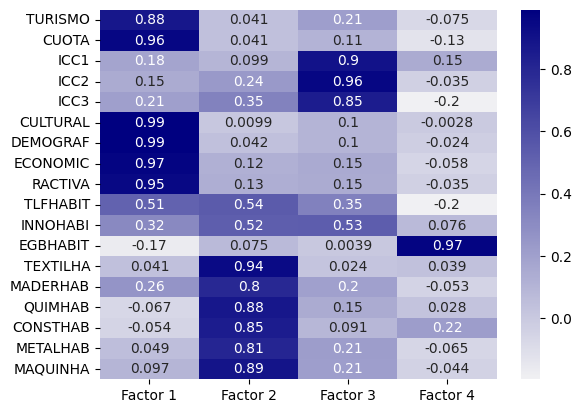

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu objeto 'fa' creado con el análisis factorial
factor_loadings = fa.loadings_

# Crear un DataFrame para mostrar las variables asociadas con cada factor
variables_factor_df = pd.DataFrame(factor_loadings, index=df_numeric.columns, columns=[f'Factor {i+1}' for i in range(factor_loadings.shape[1])])

# Definir una paleta de colores para resaltar las cargas factoriales
cmap = sns.light_palette("navy", as_cmap=True)

# Mostrar la tabla con colores
sns.heatmap(variables_factor_df, annot=True, cmap=cmap)
plt.show()


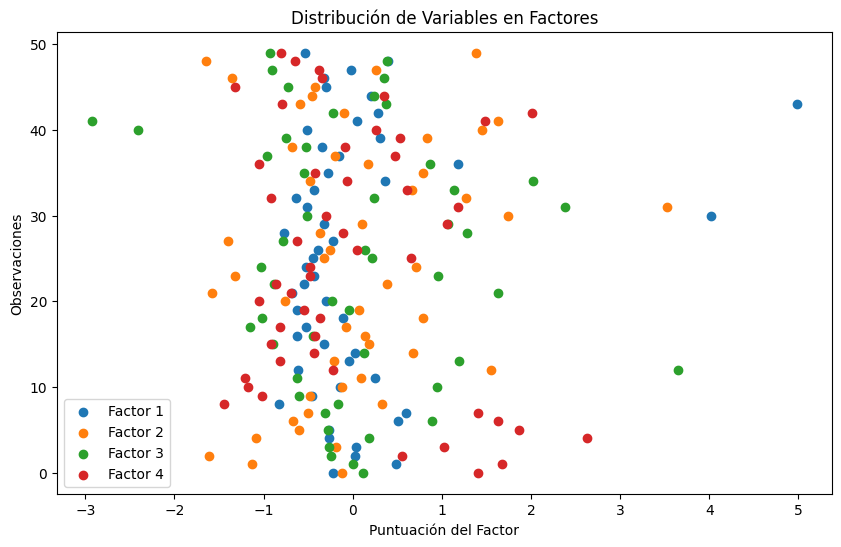

In [32]:
import matplotlib.pyplot as plt

# Supongamos que ya tienes tu objeto 'fa' creado con el análisis factorial
factor_scores = fa.transform(df_numeric)

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
for i in range(factor_scores.shape[1]):
    plt.scatter(factor_scores[:, i], range(len(df_numeric)), label=f'Factor {i+1}')

# Añadir etiquetas y leyenda
plt.title('Distribución de Variables en Factores')
plt.xlabel('Puntuación del Factor')
plt.ylabel('Observaciones')
plt.legend()
plt.show()


In [34]:
# Supongamos que 'fa' es tu objeto de análisis factorial ya ajustado

# Nuevos datos del individuo (reemplaza estos valores con los datos reales)
nuevo_individuo = [150, 200, 0.95, 0.92, 0.88, 2500, 2200, 2000, 1800, 40000, 15000, 12000, 300, 200, 150, 100, 120, 350]

# Transforma los datos del nuevo individuo usando las cargas factoriales
nuevo_individuo_factor_scores = fa.transform([nuevo_individuo])

# Imprime las puntuaciones del factor para el nuevo individuo
print("Puntuaciones del Factor para el Nuevo Individuo:")
for i, score in enumerate(nuevo_individuo_factor_scores[0]):
    print(f"Factor {i+1}: {score}")


Puntuaciones del Factor para el Nuevo Individuo:
Factor 1: 0.3126191980349541
Factor 2: -1.1814540186835
Factor 3: -0.44734788504809037
Factor 4: -0.742025188948206


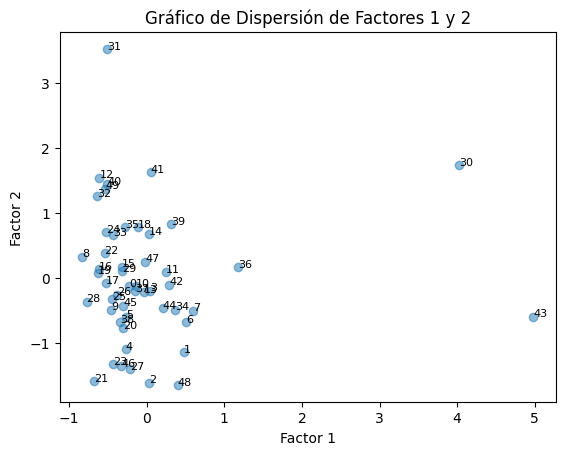

In [42]:
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con los datos
# y 'fa' es tu objeto FactorAnalyzer ya ajustado

# Obtén las puntuaciones de los factores para cada individuo
factor_scores = fa.transform(df_numeric)

# Grafico de dispersión para el Factor 1 y el Factor 2
plt.scatter(factor_scores[:, 0], factor_scores[:, 1], alpha=0.5)
plt.title('Gráfico de Dispersión de Factores 1 y 2')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')

# Etiqueta los puntos con el nombre de los países o índices de los individuos
for i, txt in enumerate(df_numeric.index):
    plt.annotate(txt, (factor_scores[i, 0], factor_scores[i, 1]), fontsize=8)

plt.show()


In [44]:
import plotly.express as px

# Supongamos que 'df' es tu DataFrame con los datos
# y 'fa' es tu objeto FactorAnalyzer ya ajustado

# Obtén las puntuaciones de los factores para cada individuo
factor_scores = fa.transform(df_numeric)

# Crea un DataFrame con las puntuaciones de los factores y el nombre de los países
df_factor_scores = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(factor_scores.shape[1])])
df_factor_scores['País'] = df_numeric.index

# Grafico de dispersión interactivo con plotly
fig = px.scatter(df_factor_scores, x='Factor_1', y='Factor_2', text='País', title='Gráfico Interactivo de Factores 1 y 2')
fig.update_traces(marker=dict(size=12, opacity=0.5))

# Muestra el gráfico
fig.show()
